In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import sys
sys.path.insert(0, '..')

In [99]:
# RR 1 / 2 / 4 / 8
dmc_utd_simbav2_mean       = [0.662, 0.729, 0.771, 0.769]
dmc_utd_simbav2_reset_mean = [0.639, 0.714, 0.725, 0.776]
dmc_utd_simba_mean         = [0.658, 0.706, 0.716, 0.720]
dmc_utd_simba_reset_mean   = [0.663, 0.689, 0.755, 0.779]

dmc_utd_simbav2_std       = [0.091, 0.063, 0.083, 0.087]
dmc_utd_simbav2_reset_std = [0.096, 0.092, 0.085, 0.081]
dmc_utd_simba_std         = [0.093, 0.052, 0.087, 0.088]
dmc_utd_simba_reset_std   = [0.091, 0.085, 0.087, 0.079]

hb_utd_simbav2_mean       = [0.798, 0.863, 0.874, 0.940]
hb_utd_simbav2_reset_mean = [0.730, 0.868, 0.827, 0.833]
hb_utd_simba_mean         = [0.539, 0.519, 0.517, 0.558]
hb_utd_simba_reset_mean   = [0.515, 0.614, 0.693, 0.701]

hb_utd_simbav2_std       = [0.122, 0.073, 0.118, 0.105]
hb_utd_simbav2_reset_std = [0.137, 0.104, 0.141, 0.132]
hb_utd_simba_std         = [0.117, 0.082, 0.114, 0.136]
hb_utd_simba_reset_std   = [0.114, 0.132, 0.133, 0.107]

In [100]:
# Param: 128 / 256 / 512 / 1024
dmc_param_simbav2_mean   = [0.360, 0.611, 0.729, 0.729]
dmc_param_simba_mean     = [0.308, 0.513, 0.706, 0.713]
dmc_param_simbav2_std    = [0.071, 0.095, 0.065, 0.084]
dmc_param_simba_std      = [0.066, 0.086, 0.051, 0.085]

hb_param_simbav2_mean    = [0.372, 0.704, 0.863, 0.923]
hb_param_simba_mean      = [0.368, 0.394, 0.519, 0.527]
hb_param_simbav2_std     = [0.110, 0.143, 0.073, 0.081]
hb_param_simba_std       = [0.100, 0.095, 0.084, 0.118]

In [101]:
simbav2_color = "#648EF6" #sns.color_palette("YlGn",20)[9]
simbav2_reset_color = "#8cb0f8" # light:"#8cb0f8" dark: "#5978ea"
simbav2_alpha_color = "#8cb0f8"
simba_color = "#F6CC64"
simba_reset_color = "#f8d48c" # light:"#ffcb10" dark: "#e8a700"
simba_alpha_color = "#f8d48c"

In [102]:
def set_identical_grid(ax, num_x_ticks, num_y_ticks, tick_x_min, tick_x_max, tick_y_min, tick_y_max):
    # This function adds evenly spaced grid lines
    ax.xaxis.set_major_locator(plt.MaxNLocator(num_x_ticks, integer=True))
    ax.yaxis.set_major_locator(plt.MaxNLocator(num_y_ticks, integer=True))
    ax.xaxis.grid(True, linestyle='--', linewidth=1.0, alpha=1.0)
    ax.yaxis.grid(True, linestyle='--', linewidth=1.0, alpha=1.0)
    # Set ticks after limits are defined
    ax.set_xticks(np.linspace(tick_x_min, tick_x_max, num_x_ticks))
    ax.set_yticks(np.linspace(tick_y_min, tick_y_max, num_y_ticks))

def simple_axis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#### Param

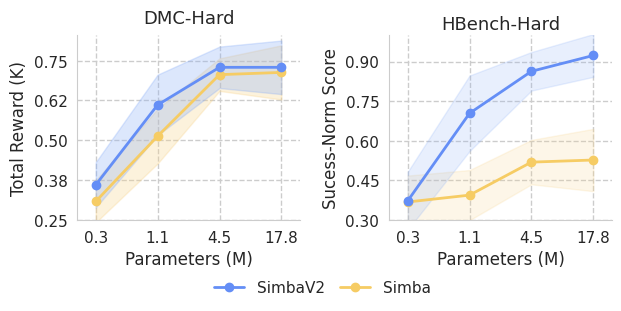

In [113]:
# Set the plot style
sns.set_style('whitegrid')

# Create the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(6.9, 2.4))

from matplotlib.ticker import FormatStrFormatter

#####################################
## DMC
ax = axes[0]
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
x = [0, 1, 2, 3]
ax.plot(
    x, 
    dmc_param_simbav2_mean, 
    marker='o', 
    label='SimbaV2', 
    color=simbav2_color, 
    linewidth=2, 
    zorder=4
)
ax.plot(
    x, 
    dmc_param_simba_mean, 
    marker='o', 
    label='Simba', 
    color=simba_color, 
    linewidth=2, 
    zorder=3
)
ax.fill_between(
    x,
    np.array(dmc_param_simbav2_mean) - np.array(dmc_param_simbav2_std),
    np.array(dmc_param_simbav2_mean) + np.array(dmc_param_simbav2_std),
    alpha=0.3,
    color=simbav2_alpha_color,
    zorder=2,
)
ax.fill_between(
    x,
    np.array(dmc_param_simba_mean) - np.array(dmc_param_simba_std),
    np.array(dmc_param_simba_mean) + np.array(dmc_param_simba_std),
    alpha=0.3,
    color=simba_alpha_color,
    zorder=1,
)

ax.set_xlabel('Parameters (M)', fontsize=12)
ax.set_ylabel('Total Reward (K)', fontsize=12)

set_identical_grid(
    ax, 
    num_x_ticks=4, 
    num_y_ticks=5,
    tick_x_min=0,
    tick_x_max=3,
    tick_y_min=0.25,
    tick_y_max=0.75
)
simple_axis(ax)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlim(-0.3, 3.3)
ax.set_ylim(0.250, 0.83)
ax.set_xticklabels([0.3,1.1,4.5,17.8])
ax.set_title('DMC-Hard', fontsize=13, y=1.02)


#####################################
## HBench
ax = axes[1]
x = [0, 1, 2, 3]
ax.plot(
    x, 
    hb_param_simbav2_mean, 
    marker='o', 
    label='SimbaV2', 
    color=simbav2_color, 
    linewidth=2, 
    zorder=4
)
ax.plot(
    x, 
    hb_param_simba_mean, 
    marker='o', 
    label='Simba', 
    color=simba_color, 
    linewidth=2,
    zorder=3
)
ax.fill_between(
    x,
    np.array(hb_param_simbav2_mean) - np.array(hb_param_simbav2_std),
    np.array(hb_param_simbav2_mean) + np.array(hb_param_simbav2_std),
    alpha=0.2,
    color=simbav2_alpha_color,
    zorder=2,
)
ax.fill_between(
    x,
    np.array(hb_param_simba_mean) - np.array(hb_param_simba_std),
    np.array(hb_param_simba_mean) + np.array(hb_param_simba_std),
    alpha=0.2,
    color=simba_alpha_color,
    zorder=1,
)

ax.set_xlabel('Parameters (M)', fontsize=12)
ax.set_ylabel('Sucess-Norm Score', fontsize=12)

set_identical_grid(
    ax, 
    num_x_ticks=4, 
    num_y_ticks=5,
    tick_x_min=0,
    tick_x_max=3,
    tick_y_min=0.3,
    tick_y_max=0.9)

simple_axis(ax)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlim(-0.3, 3.3)
ax.set_ylim(0.3, 1.0)
ax.set_xticklabels([0.3,1.1,4.5,17.8])
ax.set_title('HBench-Hard', fontsize=13, y=0.99)

plt.legend(loc='upper center', bbox_to_anchor=(-0.3, -0.25), ncol=2, fontsize=11,  frameon=False, columnspacing=1.0)
plt.subplots_adjust(wspace=0.4)

plt.savefig("param_scaling.pdf",bbox_inches='tight', pad_inches=0)

#### UTD

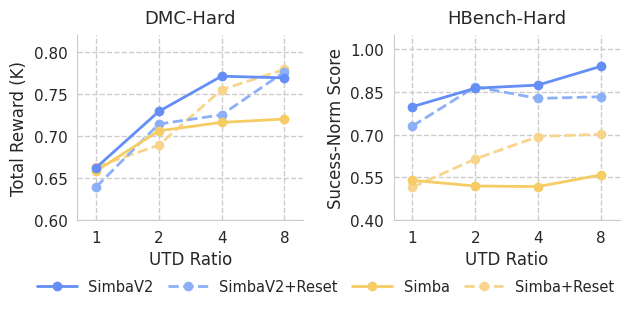

In [112]:
# Set the plot style
sns.set_style('whitegrid')

# Create the figure and axis
fig, axes = plt.subplots(1, 2, figsize=(7.0, 2.4))

#####################################
## DMC
ax = axes[0]
x = [0, 1, 2, 3]
ax.plot(
    x, 
    dmc_utd_simbav2_mean, 
    marker='o', 
    label='SimbaV2', 
    color=simbav2_color, 
    linewidth=2, 
    zorder=10
)
ax.plot(
    x, 
    dmc_utd_simbav2_reset_mean, 
    marker='o', 
    label='SimbaV2+Reset', 
    color=simbav2_reset_color, 
    linewidth=2, 
    zorder=8, 
    linestyle='dashed'
)
ax.plot(
    x, 
    dmc_utd_simba_mean, 
    marker='o', 
    label='Simba', 
    color=simba_color, 
    zorder=9, 
    linewidth=2
)
ax.plot(
    x, 
    dmc_utd_simba_reset_mean, 
    marker='o', 
    label='Simba+Reset', 
    color=simba_reset_color, 
    linewidth=2,
    zorder=7,
    linestyle='dashed'
)

ax.set_xlabel('UTD Ratio', fontsize=12)
ax.set_ylabel('Total Reward (K)', fontsize=12)

set_identical_grid(
    ax, 
    num_x_ticks=4, 
    num_y_ticks=5,
    tick_x_min=0,
    tick_x_max=3,
    tick_y_min=0.6,
    tick_y_max=0.8)
simple_axis(ax)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlim(-0.3, 3.3)
ax.set_ylim(0.6, 0.82)
ax.set_xticklabels([1, 2, 4, 8])
ax.set_title('DMC-Hard', fontsize=13, y=1.02)


#####################################
## HBench
ax = axes[1]
x = [0, 1, 2, 3]
ax.plot(
    x, 
    hb_utd_simbav2_mean, 
    marker='o', 
    label='SimbaV2', 
    color=simbav2_color,
    linewidth=2, 
    zorder=10
)
ax.plot(
    x, 
    hb_utd_simbav2_reset_mean, 
    marker='o', 
    label='SimbaV2+Reset', 
    color=simbav2_reset_color, 
    linewidth=2, 
    zorder=1, 
    linestyle='dashed'
)
ax.plot(
    x, 
    hb_utd_simba_mean, 
    marker='o', 
    label='Simba', 
    color=simba_color, 
    zorder=5, 
    linewidth=2
)
ax.plot(x, hb_utd_simba_reset_mean, marker='o', label='Simba+Reset', 
        color=simba_reset_color, linewidth=2, linestyle='dashed')

ax.set_xlabel('UTD Ratio', fontsize=12)
ax.set_ylabel('Sucess-Norm Score', fontsize=12)

set_identical_grid(
    ax, 
    num_x_ticks=4, 
    num_y_ticks=5,
    tick_x_min=0,
    tick_x_max=3,
    tick_y_min=0.4,
    tick_y_max=1.0)
simple_axis(ax)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.set_xlim(-0.3, 3.3)
ax.set_ylim(0.4, 1.05)
ax.set_xticklabels([1, 2, 4, 8])
ax.set_title('HBench-Hard', fontsize=13, y=1.02)

#fig.suptitle('DMC-Hard (7 tasks)', fontsize=13, y=1.02)

plt.legend(loc='upper center', bbox_to_anchor=(-0.3, -0.25), ncol=4, fontsize=10.5,  
           frameon=False, columnspacing=1.0, handlelength=2.7)

#plt.subplots_adjust(hspace=2)
plt.subplots_adjust(wspace=0.4)
plt.savefig("utd_scaling.pdf",bbox_inches='tight', pad_inches=0)